<a href="https://www.kaggle.com/code/kagirinae/visualizations?scriptVersionId=98453999" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#My three imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Reading in the working data file
data = pd.read_csv('../input/data10/data0.csv', low_memory=False)

<BarContainer object of 76 artists>

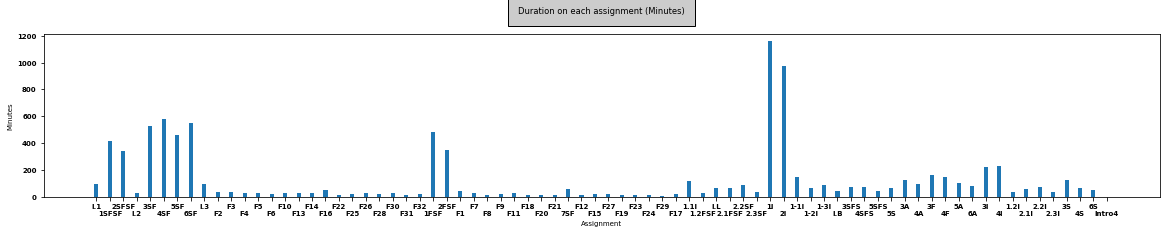

In [3]:
#Gathers a list of the problem names
problems = data["Problem Name"].unique()
problemDurations = []
count = 0;
#Go through each problem and total the duration
for problem in problems:
    problemData = data[data["Problem Name"] == problem]
    problemDurations.append(problemData['Duration (sec)'].sum()/60.0)
    count+=1
    if count % 2 == 0:
        problems[count-1] = "\n"+problem
#Formating
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 7}
plt.rc('font', **font)
plt.figure(figsize=(20, 3))
plt.ylabel('Minutes')
plt.xlabel('Assignment')
plt.title("Duration on each assignment (Minutes)", pad = 20, bbox={'facecolor':'0.8', 'pad':10})
plt.bar(problems, problemDurations, align='center', width=0.3)


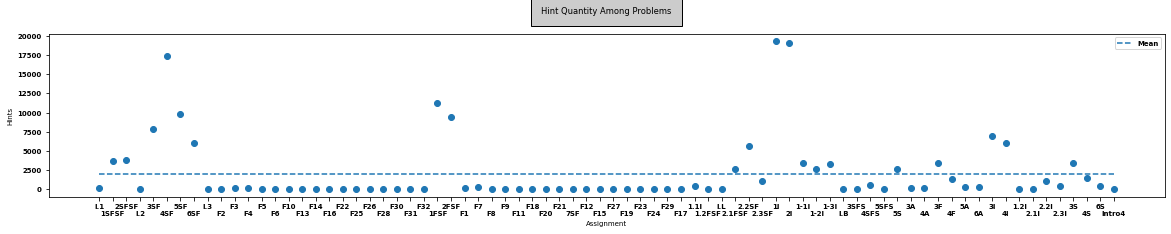

In [4]:
problemHints = []
#Gathers a list of the problem names
problems = data["Problem Name"].unique()
count = 0
#Move thorugh each of the problems and tally the hints
for problem in problems:
    problemData = data[data["Problem Name"] == problem]
    problemHints.append(problemData[problemData["Student Response Type"] == 'HINT_REQUEST'].size)
    count+=1
    if count % 2 == 0:
        problems[count-1] = "\n"+problem
#Formating
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 7}
plt.rc('font', **font)
plt.figure(figsize=(20, 3))
hintPoints = plt.scatter(problems, problemHints)
mean = sum(problemHints)/len(problemHints)
hintMean = plt.plot(problems,[mean]*len(problems), label='Mean', linestyle='--')
legend = plt.legend(loc='upper right')
plt.title("Hint Quantity Among Problems", pad = 20, bbox={'facecolor':'0.8', 'pad':10})
plt.ylabel('Hints')
plt.xlabel('Assignment')
plt.show()

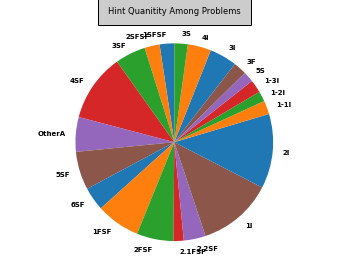

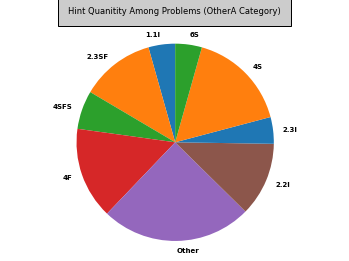

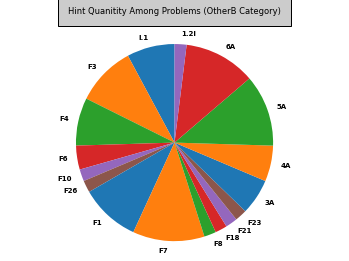

In [5]:
#Gathers a list of the problem names
problems = data["Problem Name"].unique()
problemHints = []
#Tally of the hint requests
for problem in problems:
    problemData = data[data["Problem Name"] == problem]
    problemHints.append(problemData[problemData["Student Response Type"] == 'HINT_REQUEST'].size)
#Calculate the mean hint rquest quantity
mean = sum(problemHints)/len(problemHints)
total = 0.0
count = 0
otherValsA = []
otherProblemsA = []
#Sift out all of the values under the mean into another list otherProblemsA
while count < len(problemHints):
    val = problemHints[count]
    if val < mean:
        total += val
        problemHints.pop(count)
        if val > 0:
            otherValsA.append(val)
            otherProblemsA.append(problems[count])
        problems = np.delete(problems, count)
        count-=1
    count += 1
#Format the first pie chart
problemHints.insert(4, total)
problems = np.insert(problems, 4, "OtherA")
fig1, ax1 = plt.subplots()
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]
ax1.pie(problemHints, labels=problems, shadow=False, startangle=90, colors=colors)
plt.title("Hint Quanitity Among Problems", pad = 20, bbox={'facecolor':'0.8', 'pad':10})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is d
plt.show()

count = 0
otherValsB = []
otherProblemsB = []
total = 0
#Recalculate the mean
mean = sum(otherValsA)/len(otherValsA)
#Of the sifted values again sift out the values less then the mean
while count < len(otherValsA):
    val = otherValsA[count]
    if val < mean:
        total += val
        otherValsA.pop(count)
        if val > 0:
            otherValsB.append(val)
            otherProblemsB.append(otherProblemsA[count])
        otherProblemsA = np.delete(otherProblemsA, count)
        count-=1
    count += 1
#Formating for the second pie chart
otherValsA.insert(4, total)
otherProblemsA = np.insert(otherProblemsA, 4, "OtherB")
fig1, ax1 = plt.subplots()
ax1.pie(otherValsA, labels=otherProblemsA, shadow=False, startangle=90, colors=colors)
plt.title("Hint Quanitity Among Problems (OtherA Category)", pad = 20, bbox={'facecolor':'0.8', 'pad':10})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#Formating for the third pie chart
fig1, ax1 = plt.subplots()
ax1.pie(otherValsB, labels=otherProblemsB, shadow=False, startangle=90, colors=colors)
plt.title("Hint Quanitity Among Problems (OtherB Category)", pad = 20, bbox={'facecolor':'0.8', 'pad':10})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

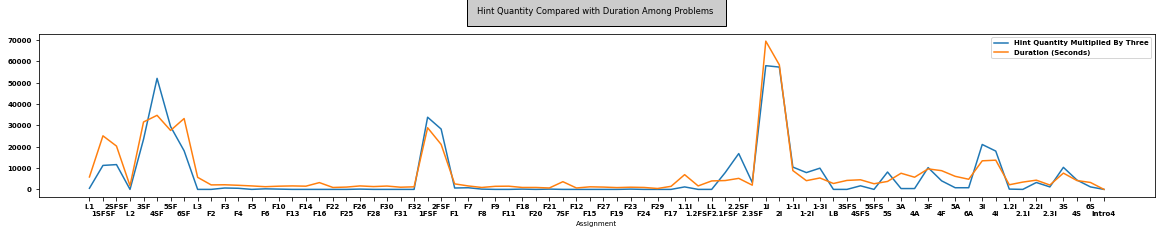

In [6]:
#Find a list of the problems
problems = data["Problem Name"].unique()
problemDurations = []
count = 0;
#Find the duration total for each problem
for problem in problems:
    problemData = data[data["Problem Name"] == problem]
    problemDurations.append(problemData['Duration (sec)'].sum())
    count+=1
    if count % 2 == 0:
        problems[count-1] = "\n"+problem
problemsA = problems

problemHints = []
problems = data["Problem Name"].unique()
count = 0
#Find the total number of hints in each problem and multiply that value by three
for problem in problems:
    problemData = data[data["Problem Name"] == problem]
    problemHints.append(problemData[problemData["Student Response Type"] == 'HINT_REQUEST'].size*3)
    count+=1
    if count % 2 == 0:
        problems[count-1] = "\n"+problem
#Overlap the data into two plots and format
plt.figure(figsize=(20, 3))
hintPoints = plt.plot(problems, problemHints, label='Hint Quantity Multiplied By Three')
problemPoints = plt.plot(problemsA, problemDurations, label='Duration (Seconds)')
legend = plt.legend(loc='upper right')
plt.title("Hint Quantity Compared with Duration Among Problems ", pad = 20, bbox={'facecolor':'0.8', 'pad':10})
plt.xlabel('Assignment')
plt.show()
